In [1]:
import pandas as pd
import warnings
import sys  

PROJECT_FOLDER = '/home/ricardo/coding/data-science/projects/predict_value_change_from_fm_data/'

sys.path.insert(0, PROJECT_FOLDER)
warnings.filterwarnings('ignore')

fm20_df = pd.read_csv(PROJECT_FOLDER + "datasets/datafm20.csv")
fm17_df = pd.read_csv(PROJECT_FOLDER + "datasets/datafm17.csv")

<AxesSubplot:xlabel='Age'>

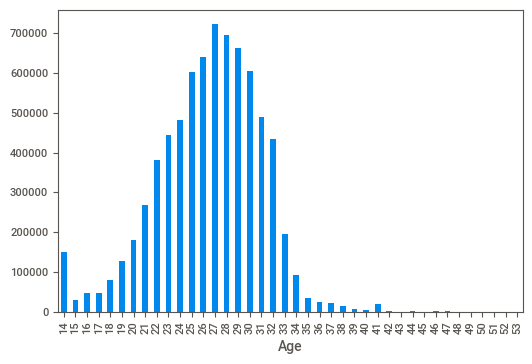

In [25]:
new_fm20_df = fm20_df[:]
new_fm20_df['POT'] = new_fm20_df['PA'] - new_fm20_df['CA']
new_fm20_df.groupby('Age')['Value'].mean().plot(kind='bar')

<AxesSubplot:>

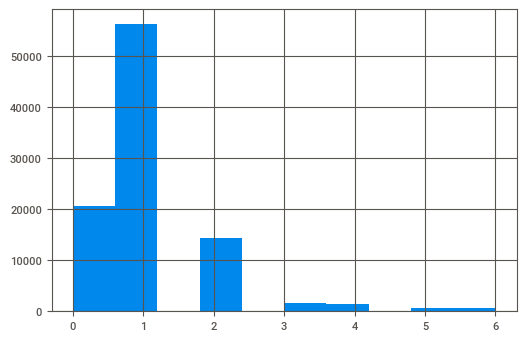

In [27]:
import numpy as np

new_fm20_df = fm20_df[:].query('Age <= 27 & `Best Pos` != "GK"')
new_fm20_df['Val_cat'] = pd.cut(new_fm20_df["Value"], bins=[-1, 0, 100000, 1000000, 2000000, 5000000, 10000000, np.inf], labels=[0, 1, 2, 3, 4, 5, 6])
new_fm20_df['Val_cat'].hist()

In [38]:
import sweetviz as sv
from utils import PLAYER_ATTR

def attribute_combinations(df, new_attr, attr_list):
    df[new_attr] = sum([df[attr] for attr in attr_list]) / len(attr_list)

new_fm20_df = fm20_df[:].query('Age <= 27 & `Best Pos` != "GK"')

attribute_combinations(new_fm20_df, 'PHY', ['Acc', 'Pac', 'Sta', 'Str', 'Agi', 'Bal', 'Jum', 'Nat'])
attribute_combinations(new_fm20_df, 'MEN', ['Wor', 'Vis', 'Tea', 'Pos', 'OtB', 'Ldr', 'Fla', 'Det', 'Dec', 'Cnt', 'Cmp', 'Bra', 'Ant', 'Agg'])
attribute_combinations(new_fm20_df, 'M+P', ['MEN', 'PHY'])
attribute_combinations(new_fm20_df, 'ATTR', PLAYER_ATTR)


report = sv.analyze(new_fm20_df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
fifa_wr = pd.read_csv(PROJECT_FOLDER + "datasets/fifa_ranking-2021-05-27.csv")

In [42]:
fifa_wr.query('rank_date == "2020-10-22"')[['rank', 'country_abrv']]

,rank,country_abrv
61794,68,SLV
61795,69,ALB
61796,70,IRQ
61797,71,GUI
61798,76,UGA
...,...,...
61999,136,TPE
62000,134,TAN
62001,134,MYA
62002,132,COM


In [3]:
transfermarkt_players = pd.read_csv(PROJECT_FOLDER + "datasets/players.csv")

In [15]:
from utils import name_to_id

name_nation_mapping = fm20_df.sort_values(by='Value', ascending=False).groupby('Nation').head()[['Name', 'Nation']]
name_nation_mapping['name'] = name_nation_mapping['Name'].apply(name_to_id)
nation_mapping = name_nation_mapping.merge(transfermarkt_players[['name', 'country_of_citizenship']], on='name')
nation_mapping.drop_duplicates(subset='country_of_citizenship', inplace=True)
nation_mapping = nation_mapping[['Nation', 'country_of_citizenship']]

In [5]:
fm20_df['Best Pos'].unique()

array(['AM (R)', 'ST (C)', 'GK', 'AM (L)', 'M (C)', 'D (C)', 'M (R)',
       'DM', 'AM (C)', 'M (L)', 'D (R)', 'D (L)', 'WB (R)', 'WB (L)'],
      dtype=object)

In [5]:
import pandas as pd
PROJECT_FOLDER = '/home/ricardo/coding/data-science/projects/predict_value_change_from_fm_data/'

clubs = pd.read_csv(PROJECT_FOLDER + "datasets/clubs.csv")

